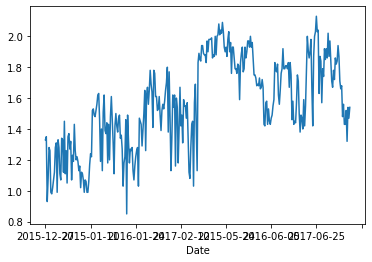

In [9]:
import pandas as pd
df['Date'] = pd.to_datetime(df['Date'])
df= pd.read_csv("avocado.csv")
albany_df = df[df['region']=='Albany']
albany_df.set_index("Date", inplace= True)
albany_df["AveragePrice"].plot()


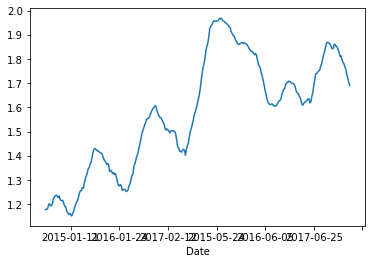

In [8]:
albany_df['AveragePrice'].rolling(25).mean().plot()

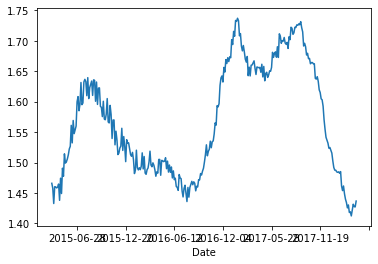

In [11]:
albany_df.sort_index(inplace = True)
albany_df['AveragePrice'].rolling(25).mean().plot()

In [13]:
albany_df["price25ma"] = albany_df["AveragePrice"].rolling(25).mean()

In [14]:
albany_df = df.copy()[df['region']=="Albany"]
albany_df.set_index('Date', inplace=True)
albany_df["price25ma"] = albany_df["AveragePrice"].rolling(25).mean()

In [16]:
df['region'].values
df['region'].values.tolist()
print(set(df['region'].values.tolist()))

{'GreatLakes', 'Southeast', 'NorthernNewEngland', 'WestTexNewMexico', 'Nashville', 'Albany', 'RaleighGreensboro', 'Plains', 'BuffaloRochester', 'Atlanta', 'Boise', 'Indianapolis', 'SouthCarolina', 'PhoenixTucson', 'Louisville', 'SanDiego', 'TotalUS', 'HarrisburgScranton', 'California', 'SouthCentral', 'Roanoke', 'MiamiFtLauderdale', 'Philadelphia', 'Houston', 'DallasFtWorth', 'CincinnatiDayton', 'Charlotte', 'Northeast', 'Spokane', 'Syracuse', 'Orlando', 'Jacksonville', 'SanFrancisco', 'LasVegas', 'Chicago', 'RichmondNorfolk', 'GrandRapids', 'Boston', 'BaltimoreWashington', 'NewOrleansMobile', 'StLouis', 'Detroit', 'NewYork', 'Sacramento', 'Tampa', 'West', 'Columbus', 'Midsouth', 'Portland', 'Seattle', 'Denver', 'LosAngeles', 'HartfordSpringfield', 'Pittsburgh'}


In [17]:
graph_df = pd.DataFrame()

for region in df['region'].unique()[:16]:
    print(region)
    region_df = df.copy()[df['region']==region]
    region_df.set_index('Date', inplace=True)
    region_df.sort_index(inplace=True)
    region_df[f"{region}_price25ma"] = region_df["AveragePrice"].rolling(25).mean()

    if graph_df.empty:
        graph_df = region_df[[f"{region}_price25ma"]]  # note the double square brackets!
    else:
        graph_df = graph_df.join(region_df[f"{region}_price25ma"])

Albany
Atlanta
BaltimoreWashington
Boise
Boston
BuffaloRochester
California
Charlotte
Chicago
CincinnatiDayton
Columbus
DallasFtWorth
Denver
Detroit
GrandRapids
GreatLakes


In [ ]:
import pandas as pd

df = pd.read_csv("datasets/avocado.csv")
df = df.copy()[df['type']=='organic']

df["Date"] = pd.to_datetime(df["Date"])

df.sort_values(by="Date", ascending=True, inplace=True)
df.head()